# Background and hypotheses

The two hypotheses that i will be testing are:

1) Is there a difference between the number of birds struck and whether there was damage to the aircraft?

My hypothesis for this question is that there will be a difference between the number of birds struck and whether there was damage to the aircraft. 


2) Is there a difference in the altitude that bird strikes occured and whether there was damage to the aircraft?

My hypothesis for the second question is that there will not be a difference between the altitude where the strike occured and whether there was damage to the aircraft. 

In [1]:
#set up your environment

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#read in the csv file
df = pd.read_csv(r'C:\Users\erine\OneDrive\Documents\Python Scripts\VS Code Getting Started\bird_strikes.csv')

#get to know the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  25429 non-null  object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,...,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25T00:00:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14T00:00:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05T00:00:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23T00:00:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False


# Question 1: Is there a correlation between the number of birds struck and whether there was damage to the aircraft?

In [2]:
#split data into groups based on whether there was damage to the aircraft
damage_yes = df[(df['effect_indicated_damage'] == 'Caused damage')]
damage_yes.info()

damage_no = df[(df['effect_indicated_damage'] == 'No damage')]
damage_no.info()

#check info for null values in columns of interest

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                2477 non-null   int64  
 1   aircraft_type                            2454 non-null   object 
 2   airport_name                             2454 non-null   object 
 3   altitude_bin                             2454 non-null   object 
 4   aircraft_make_model                      2477 non-null   object 
 5   wildlife_number_struck                   2454 non-null   object 
 6   wildlife_number_struck_actual            2477 non-null   int64  
 7   effect_impact_to_flight                  2454 non-null   object 
 8   flightdate                               2454 non-null   object 
 9   effect_indicated_damage                  2477 non-null   object 
 10  aircraft_number_of_engines               2451 n

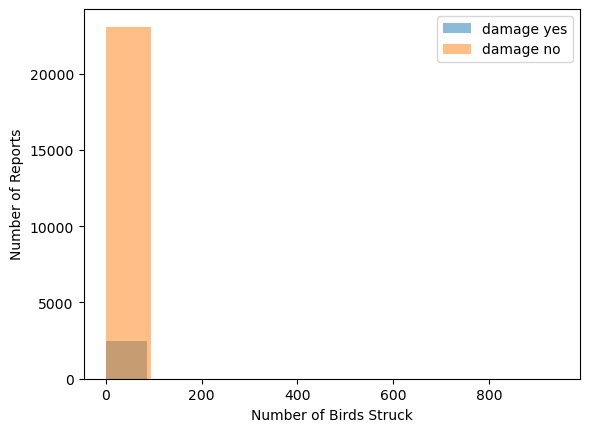

DescribeResult(nobs=2477, minmax=(1, 859), mean=4.669761808639484, variance=544.6606886750675, skewness=24.11296737497558, kurtosis=783.4823070064551)
DescribeResult(nobs=23081, minmax=(1, 942), mean=2.479225336857155, variance=122.35720487647414, skewness=50.55615147303082, kurtosis=3721.3367538736375)


In [3]:
#plot histograms for each dataset
plt.hist(damage_yes['wildlife_number_struck_actual'], bins = 10, alpha =0.5, label = "damage yes")
plt.hist(damage_no['wildlife_number_struck_actual'], bins= 10, alpha =0.5, label = "damage no")
plt.legend(loc="upper right")
plt.xlabel('Number of Birds Struck')
plt.ylabel('Number of Reports')
plt.show()

print(stats.describe(damage_yes['wildlife_number_struck_actual']))
print(stats.describe(damage_no['wildlife_number_struck_actual']))

#histogram shows very heavy skew with most of the data being low values


In [4]:
#check unique values for range of number of birds struck and see how many fall into each category
damage_yes['wildlife_number_struck'].nunique()
unique_values = damage_yes['wildlife_number_struck'].value_counts()
print(unique_values)

damage_no['wildlife_number_struck'].nunique()
unique_values = damage_no['wildlife_number_struck'].value_counts()
print(unique_values)

#from this we can see that the vast majority of the data falls between 1 and 10, which explains the large skew


1            1789
2 to 10       584
11 to 100      77
Over 100        4
Name: wildlife_number_struck, dtype: int64
1            19001
2 to 10       3735
11 to 100      235
Over 100         4
Name: wildlife_number_struck, dtype: int64


In [21]:
#statistics

#since the data is not normal, and we have two independent groups, we can use a kruskal-wallis test

stats.kruskal(damage_yes['wildlife_number_struck_actual'], damage_no['wildlife_number_struck_actual'])



KruskalResult(statistic=148.48170656018073, pvalue=3.722489295475017e-34)

The p-value is greater than 0.05, so we would fail to reject the null hypothesis that there is no significant difference between the number of birds struck and whether there was damage to the aircraft

Conclusions and discussion: 

Based on the size of the two groups, we can see that only about 1 in 10 bird strikes result in damage to the aircraft. The results of the above test indicate that there is no significant difference between the number of birds struck and whether damage was caused, so we can infer that damage to the aircraft is about 10% possible regardless of the number of birds struck. Considering other variables, it would be interesting to look into whether the size of the wildlife struck was related to whether damage was caused, as opposed to the number of wildlife (since the majority of the bird strikes were single birds anyway). If new data could be collected in this domain, I would add a column for the location of the bird strike on the plane, as I imagine it would be more likely for there to be damage to the aircraft in certain locations (ex: if a bird was injected into an engine as opposed to impacted the aircraft nose). 


# Question 2: Test for difference in altitude and whether there was damage to the aircraft

In [25]:
#check info for null values in columns of interest (feet_above_ground)
damage_yes.info()
damage_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                2477 non-null   int64  
 1   aircraft_type                            2454 non-null   object 
 2   airport_name                             2454 non-null   object 
 3   altitude_bin                             2454 non-null   object 
 4   aircraft_make_model                      2477 non-null   object 
 5   wildlife_number_struck                   2454 non-null   object 
 6   wildlife_number_struck_actual            2477 non-null   int64  
 7   effect_impact_to_flight                  2454 non-null   object 
 8   flightdate                               2454 non-null   object 
 9   effect_indicated_damage                  2477 non-null   object 
 10  aircraft_number_of_engines               2451 n

In [6]:
#each group has some null values in the column of interest
#drop the null values from the dataframe
damage_yes_filtered = damage_yes.dropna()
damage_no_filtered = damage_no.dropna()

damage_yes_filtered.info()
damage_no_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                2295 non-null   int64  
 1   aircraft_type                            2295 non-null   object 
 2   airport_name                             2295 non-null   object 
 3   altitude_bin                             2295 non-null   object 
 4   aircraft_make_model                      2295 non-null   object 
 5   wildlife_number_struck                   2295 non-null   object 
 6   wildlife_number_struck_actual            2295 non-null   int64  
 7   effect_impact_to_flight                  2295 non-null   object 
 8   flightdate                               2295 non-null   object 
 9   effect_indicated_damage                  2295 non-null   object 
 10  aircraft_number_of_engines               2295 n

In [36]:
#check unique values
damage_yes_filtered['feet_above_ground'].nunique()
unique_values = damage_yes_filtered['feet_above_ground'].value_counts()
print(unique_values[:5])

damage_no_filtered['feet_above_ground'].nunique()
unique_values = damage_no_filtered['feet_above_ground'].value_counts()
print(unique_values[:5])

#the majority of bird strikes appear to occur during takeoff, while the plane is still on the ground (0 feet above ground)

0.0       591
1000.0    104
2000.0     98
100.0      94
200.0      86
50.0       83
10.0       79
500.0      77
1500.0     75
300.0      70
3000.0     64
400.0      55
800.0      53
4000.0     44
2500.0     39
5.0        37
Name: feet_above_ground, dtype: int64
0.0       7254
100.0      948
50.0       933
200.0      680
10.0       638
500.0      587
1000.0     530
300.0      457
3000.0     422
20.0       390
2000.0     362
1500.0     333
400.0      312
800.0      262
4000.0     231
5.0        202
Name: feet_above_ground, dtype: int64


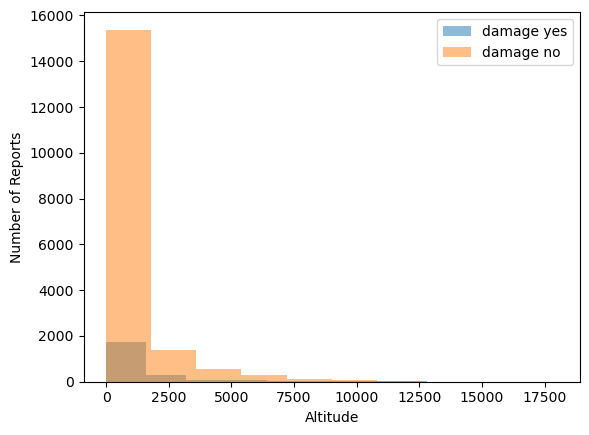

DescribeResult(nobs=2295, minmax=(0.0, 16000.0), mean=1274.9320261437908, variance=5139774.776545806, skewness=2.9171410058030953, kurtosis=9.981330448152578)
DescribeResult(nobs=17847, minmax=(0.0, 18000.0), mean=733.5879979828543, variance=2704378.93015517, skewness=3.5408488950870973, kurtosis=15.621469466039663)


In [7]:
#plot histograms of the data

plt.hist(damage_yes_filtered['feet_above_ground'], alpha =0.5, label = "damage yes")
plt.hist(damage_no_filtered['feet_above_ground'], alpha =0.5, label = "damage no")
plt.legend(loc="upper right")
plt.xlabel('Altitude')
plt.ylabel('Number of Reports')
plt.show()

print(stats.describe(damage_yes_filtered['feet_above_ground']))
print(stats.describe(damage_no_filtered['feet_above_ground']))

#this data also shows a large skew

In [38]:
#since the data is not normally distributed, we will use a kruskal-wallis test
stats.kruskal(damage_yes_filtered['feet_above_ground'], damage_no_filtered['feet_above_ground'])

KruskalResult(statistic=299.85944474877294, pvalue=3.535034437191126e-67)

The p-value is larger than 0.05, so we would fail to reject the null hypothesis that there is not a difference in whether there was damage to the aircraft based on the altitude that the bird strike occurred. 

Conclusions and discussion: 

As was mentioned above, we can see that only about 1 in 10 bird strikes result in damage to the aircraft. The results of the above test indicate that there is no significant difference between the altitude that the strike occured at and whether there was damage to the aircraft, so my initial hypothesis was correct. From this we can infer that there is about a 10% possibility of a bird strike causing damage to an aircraft regarless of the altitude tha the strike occured at. 

Based on the results of the above two tests, I would be interested to explore whether there was a correlation betweenthe altitude bin (above or below 1000 ft) and the number of birds struck, as this would possibly give some information regarding what types of birds are more likely to be struck at different altitudes, which could help to direct wildlife management efforts. 